In [1]:
import json
import numpy as np
from pprint import pprint
import torch
import torchvision
from torch.utils import data
from torchvision import transforms

from dataloader import Dataset
from skimage import io
import matplotlib.pyplot as plt

from trainer import fit

from torch.optim import lr_scheduler
import torch.optim as optim
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
with open('../RESTRUCTURED_DATA/labels.json') as f:
    train_annotation = json.load(f)
    
with open('../RESTRUCTURED_DATA/labels_val.json') as f:
    val_annotation = json.load(f)

In [3]:
train_ids = list(train_annotation)
val_ids = list(val_annotation)

print(len(train_ids), train_ids[0])

30355 RESTRUCTURED_DATA/train/image0.jpg


# Distribution of DATA


7632.0 7632.0 7632.0


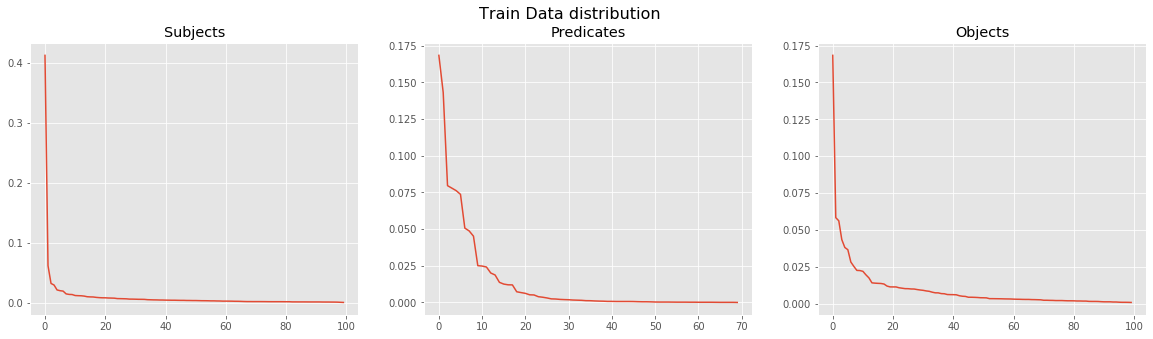

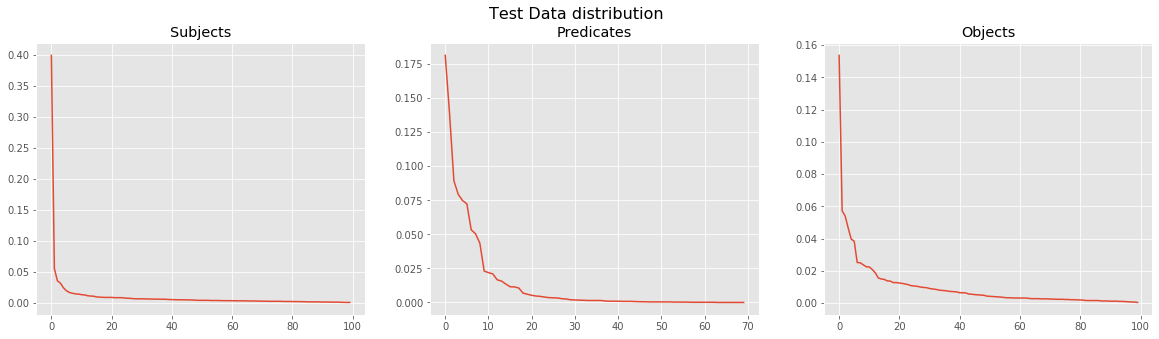

In [4]:
subjects = np.zeros(100)
predicates = np.zeros(70)
objects = np.zeros(100)

for ids in train_ids:
    subjects[int(train_annotation[ids]['subject'])] += 1
    predicates[int(train_annotation[ids]['predicate'])] += 1
    objects[int(train_annotation[ids]['object'])] += 1

    


fig, ax = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Train Data distribution', fontsize=16)
ax[0].plot(np.sort(subjects)[::-1]/np.sum(subjects))
ax[0].set_title('Subjects')
ax[1].plot(np.sort(predicates)[::-1]/np.sum(predicates))
ax[1].set_title('Predicates')
ax[2].plot(np.sort(objects)[::-1]/np.sum(objects))
ax[2].set_title('Objects')
plt.savefig('train_distribution.png', bbox_inches='tight')


subjects = np.zeros(100)
predicates = np.zeros(70)
objects = np.zeros(100)

for ids in val_ids:
    subjects[int(val_annotation[ids]['subject'])] += 1
    predicates[int(val_annotation[ids]['predicate'])] += 1
    objects[int(val_annotation[ids]['object'])] += 1

    


fig, ax = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Test Data distribution', fontsize=16)

ax[0].plot(np.sort(subjects)[::-1]/np.sum(subjects))
ax[0].set_title('Subjects')
ax[1].plot(np.sort(predicates)[::-1]/np.sum(predicates))
ax[1].set_title('Predicates')
ax[2].plot(np.sort(objects)[::-1]/np.sum(objects))
ax[2].set_title('Objects')
print(np.sum(subjects), np.sum(predicates), np.sum(objects))
plt.savefig('test_distribution.png', bbox_inches='tight')


In [5]:

# import cudnn

# from my_classes import Dataset


# CUDA for PyTorch
cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda else "cpu")
torch.backends.cudnn.benchmark = True

# Parameters
params = {'batch_size': 128,
          'shuffle': True,
          'num_workers': 6}
max_epochs = 100

# Datasets
partition = train_ids
labels = train_annotation
# Generators
transform_train = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                            ])
        
transform_test = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                ])

training_set = Dataset(partition, labels, return_key = 'subject', image_transform = transform_train)
train_loader = data.DataLoader(training_set, **params)


partition_val = val_ids
labels_val = val_annotation
val_set = Dataset(partition_val, labels_val, return_key = 'subject', image_transform = transform_test)
test_loader = data.DataLoader(val_set, **params)

In [6]:
for item in train_loader:
#     print(item[0].shape)
# #         resized_crop_rolled =
#     disp_image =  np.moveaxis(item[0][0].numpy(), 0, -1)
#     disp_image = disp_image - np.amin(disp_image)
#     disp_image = disp_image / np.amax(disp_image)
# #     disp_image =  np.moveaxis(disp_image, 1, 2)
# #     disp_image = item[0][0].numpy()
#     print(disp_image.shape)
#     print(np.amin(disp_image), np.amax(disp_image))
#     plt.figure()
#     plt.title("Generator loop")
#     io.imshow(disp_image)
#     plt.show()
#     print(item[0].shape)
    print(item[1][0].shape)
    break

torch.Size([])


In [7]:
n_classes = 100
embedding_net = None
# Set up data loaders
batch_size = 32
kwargs = {'num_workers': 1, 'pin_memory': True} if cuda else {}
# train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, **kwargs)
# test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, **kwargs)

# Set up the network and training parameters
from networks import Pretrained_EmbeddingNet, ClassificationNet, MultiTaskClassificationNet
from metrics import AccumulatedAccuracyMetric

embedding_net = Pretrained_EmbeddingNet()
model = ClassificationNet(embedding_net, n_classes=n_classes)
# print(model)
if cuda:
    model.cuda()
loss_fn = torch.nn.CrossEntropyLoss()
lr = 1e-3
optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = lr_scheduler.StepLR(optimizer, 8, gamma=0.1, last_epoch=-1)
n_epochs = 2
log_interval = 50
metrics = [AccumulatedAccuracyMetric('Subject Accuracy')]#, AccumulatedAccuracyMetric('Predicate Accuracy'), AccumulatedAccuracyMetric('Object Accuracy')]

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /home/josias/.cache/torch/checkpoints/vgg16_bn-6c64b313.pth
4.5%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

11.0%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

17.3%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_ms

In [8]:
fit(train_loader, test_loader, model, loss_fn, optimizer, scheduler, n_epochs, cuda, log_interval, multi = False,metrics=metrics)

Train: [0/30355 (0%)]	Loss: 4.588774	Subject Accuracy: 0.0
Train: [150/30355 (21%)]	Loss: 2.865168	Subject Accuracy: 43.68872549019608
Train: [300/30355 (42%)]	Loss: 2.500337	Subject Accuracy: 45.258353960396036
Train: [450/30355 (63%)]	Loss: 2.353865	Subject Accuracy: 46.00062086092715
Train: [600/30355 (84%)]	Loss: 2.310404	Subject Accuracy: 46.26088308457712
Epoch: 1/2. Train set: Average loss: 2.4779	Subject Accuracy: 46.430571569757866
Train: [0/30355 (0%)]	Loss: 1.782546	Subject Accuracy: 57.03125
Train: [150/30355 (21%)]	Loss: 2.179814	Subject Accuracy: 49.00428921568628
Train: [300/30355 (42%)]	Loss: 2.117451	Subject Accuracy: 49.28063118811881
Train: [450/30355 (63%)]	Loss: 2.116369	Subject Accuracy: 49.38948675496689
Train: [600/30355 (84%)]	Loss: 2.098157	Subject Accuracy: 49.33924129353234
Epoch: 2/2. Train set: Average loss: 2.1189	Subject Accuracy: 49.30653928512601


ClassificationNet(
  (embedding_net): Pretrained_EmbeddingNet(
    (model): VGG(
      (features): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace)
        (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (9): ReLU(inplace)
        (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (12): ReLU(inplace

In [1]:
from baselines_script import train_script as ts
ts('../RESTRUCTURED_DATA/labels.json', '../RESTRUCTURED_DATA/labels_val.json')

Initialising and training single SUBJECT network: 
Train: [0/30355 (0%)]	Loss: 4.646317	subject accuracy: 0.0
Train: [150/30355 (21%)]	Loss: 2.914697	subject accuracy: 42.63174019607843
Train: [300/30355 (42%)]	Loss: 2.512603	subject accuracy: 44.17543316831683
Train: [450/30355 (63%)]	Loss: 2.410282	subject accuracy: 45.14693708609271
Train: [600/30355 (84%)]	Loss: 2.294385	subject accuracy: 45.872201492537314
Epoch: 1/5. Train set: Average loss: 2.4961	subject accuracy: 46.160434854225
Train: [0/30355 (0%)]	Loss: 2.456008	subject accuracy: 45.3125
Train: [150/30355 (21%)]	Loss: 2.174873	subject accuracy: 49.310661764705884
Train: [300/30355 (42%)]	Loss: 2.198160	subject accuracy: 48.677289603960396
Train: [450/30355 (63%)]	Loss: 2.132004	subject accuracy: 48.94971026490066
Train: [600/30355 (84%)]	Loss: 2.119946	subject accuracy: 48.96999378109453
Epoch: 2/5. Train set: Average loss: 2.1434	subject accuracy: 49.25712403228463
Train: [0/30355 (0%)]	Loss: 2.220643	subject accuracy: 47.

/home/josias/anaconda3/envs/pytorch_cuda10/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [9]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
def get_predicted_softmax(model, test_loader):

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    test_dict = []
    test_dict_labels = []

    for batch_idx, (data, target) in enumerate(test_loader):

        data, target  = data.to(device), target.to(device)
    #             print(data.shape, target.shape)
        output = model(data)


        test_dict.extend(torch.max(output.data, 1)[1])
        test_dict_labels.extend(target)

    test_dict = np.array(test_dict)
    test_dict_labels = np.array(test_dict_labels)
    #         print(""test_dict_labels)
    return test_dict, test_dict_labels



def get_predicted_softmax_mt(model, test_loader):

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    test_dict = [[],[],[]]
    test_dict_labels = [[],[],[]]

    for batch_idx, (data, target) in enumerate(test_loader):

        data, target  = data.to(device), target.to(device)
    #             print(data.shape, target.shape)
        subject, predicate, objects = model(data)


        test_dict[0].extend(torch.max(subject.data, 1)[1])
        test_dict_labels[0].extend(target[0])
        
        test_dict[1].extend(torch.max(predicate.data, 1)[1])
        test_dict_labels[1].extend(target[1])
        
        test_dict[1].extend(torch.max(object.data, 1)[1])
        test_dict_labels[1].extend(target[1])

    test_dict = np.array(test_dict)
    test_dict_labels = np.array(test_dict_labels)
    #         print(""test_dict_labels)
    return test_dict, test_dict_labels

def calculate_recall_scores(test_dict_labels, predicted_labels):
        '''
            Returns accuracy,  average per class accurace, per class accuracy
        '''
        
        for i in range(0, len(predicted_labels)):
            
            predicted_labels[i] = predicted_labels[i]
            test_dict_labels[i] = test_dict_labels[i]
                
        

        for i in range(len(predicted_labels)):
            predicted_labels[i] = int(predicted_labels[i])
            test_dict_labels[i] = int(test_dict_labels[i])
#         print(np.array(predicted_labels), np.array(test_dict_labels))

        y_true = [test_dict_labels[i] for i in range(len(test_dict_labels))]
        y_pred = [predicted_labels[i] for i in range(len(predicted_labels))]

        print(confusion_matrix(np.array(y_true), np.array(y_pred), labels=[i for i in range(100)]))
        
        per_class_recall = recall_score(y_true, y_pred, average=None)
        print("Accuracy:", accuracy_score(y_true, y_pred))
#         print("Average per class accuracy (macro recall)", recall_score(y_true, y_pred, average="macro"))
#         print("Accuracy (micro recall)", recall_score(y_true, y_pred, average="micro"))
        print("Per class accuracy:" , per_class_recall, 100*np.mean(per_class_recall))
        

In [10]:
pred_softmax, true_softmax = get_predicted_softmax(model, test_loader )
calculate_recall_scores(true_softmax, pred_softmax)

[[2798   45   22 ...   13    0    0]
 [  47  254   67 ...    0    0    0]
 [  26   62  101 ...    1    0    0]
 ...
 [  38   11    8 ...   19    0    0]
 [  11    4    0 ...    2    0    0]
 [   3    0    0 ...    0    0    0]]
Accuracy: 0.4815251572327044
Per class accuracy: [0.91737705 0.6047619  0.42083333 0.09411765 0.54098361 0.
 0.         0.33333333 0.3866171  0.21276596 0.07826087 0.04794521
 0.46153846 0.         0.         0.08108108 0.         0.
 0.03125    0.         0.3        0.20952381 0.16949153 0.31147541
 0.2        0.38235294 0.01639344 0.         0.17721519 0.
 0.         0.03571429 0.04545455 0.         0.15555556 0.05660377
 0.         0.         0.10638298 0.         0.         0.
 0.         0.26470588 0.15384615 0.         0.         0.
 0.         0.02380952 0.         0.         0.10869565 0.5625
 0.         0.02631579 0.         0.         0.         0.
 0.         0.20833333 0.         0.         0.         0.13114754
 0.13636364 0.         0.22222222 0.23

# Distribution of data

In [10]:
((.92+.38)/100)*100

(1/70)*100


1.4285714285714286